In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [3]:
import numpy as np
from pyemd import emd

In [4]:
from lint_analysis.bin_counts.models import BinCount

In [5]:
def make_distance_matrix(dim, cost=1):
    
    d = np.zeros((dim, dim))
    
    for i in range(dim):
        for j in range(dim):
            d[i][j] = abs(i-j)*cost
            
    return d

In [6]:
s1 = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
s2 = np.array([0.0, 0.0, 0.0, 0.5, 0.5])

emd(s1, s2, make_distance_matrix(5))

3.5

In [26]:
s1 = np.array([1.0, 1.0, 1.0, 1.0, 1.0])
s2 = np.array([5.0, 0.0, 0.0, 0.0, 0.0])

emd(s1, s2, make_distance_matrix(5))

10.0

In [7]:
def series_emd(series):
    series /= series.sum()
    expected = np.full(len(series), series.sum() / len(series))
    return emd(expected, series, make_distance_matrix(len(series)))

In [8]:
series_emd(BinCount.token_series('hair'))

4.270219422282113

In [9]:
from joblib import Memory

mem = Memory('cache')

token_series = mem.cache(BinCount.token_series)
token_counts = mem.cache(BinCount.token_counts)

In [10]:
tokens = token_counts(10000)

In [11]:
data = []

for i, (token, count) in enumerate(tokens.items()):
    score = series_emd(token_series(token))
    data.append((count, score))
    if i % 100 == 0: print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900


In [12]:
import pandas as pd

df = pd.DataFrame(data, columns=('count', 'emd'), index=tokens.keys())

In [13]:
pd.set_option('display.max_rows', 1000)

df.sort_values('emd', ascending=False).head(500)

,count,emd
iv.,13733,21.098008
iii,30853,19.121258
vii,16609,15.026187
viii,17228,13.314687
ii,51677,12.988616
xx,10663,12.510152
6,31206,12.128324
3,44941,11.578408
prosecution,10345,11.178221
ix,19242,11.109682


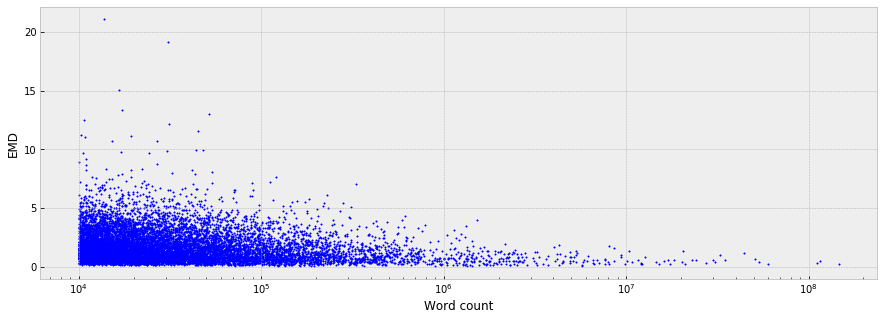

In [14]:
plt.figure(figsize=(15, 5))

plt.xlabel('Word count')
plt.ylabel('EMD')
plt.xscale('log')
plt.scatter(df['count'], df['emd'], s=2, c='b')

plt.show()

In [15]:
def knn_zscore(token, n=100):
    
    nn_idx = (
        (df['count'] - df.loc[token]['count'])
        .abs().sort_values().head(n).index
    )
    
    nn = df.loc[nn_idx]
    
    return (df.loc[token]['emd'] - nn['emd'].mean()) / nn['emd'].std()

In [24]:
knn_zscore('?')

0.4916932672216654

In [17]:
df_knn = df.copy()

df_knn['knn_zscore'] = df.index.map(knn_zscore)

In [18]:
df_knn.sort_values('knn_zscore', ascending=False).head(1000)

,count,emd,knn_zscore
iii,30853,19.121258,8.291548
iv.,13733,21.098008,7.832928
vii,16609,15.026187,6.767531
ii,51677,12.988616,6.677736
6,31206,12.128324,6.676407
3,44941,11.578408,6.262716
prosecution,10345,11.178221,6.068512
viii,17228,13.314687,5.788816
2,47991,9.900114,5.766991
ix,19242,11.109682,5.737522


In [67]:
# https://matplotlib.org/devdocs/tutorials/colors/colormapnorms.html

class MidpointNormalize(mpl.colors.Normalize):
    
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

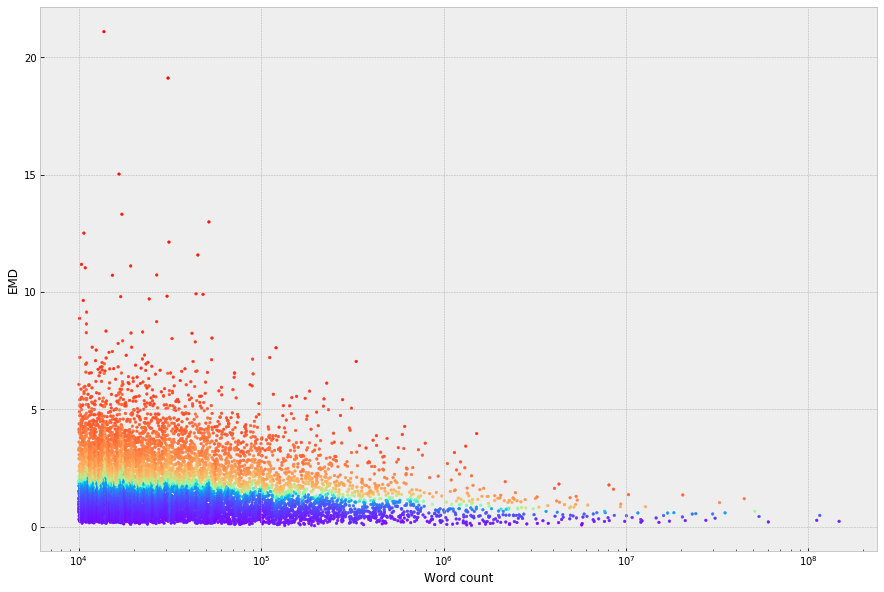

In [145]:
plt.figure(figsize=(15, 10))

plt.xlabel('Word count')
plt.ylabel('EMD')
plt.xscale('log')

norm = mpl.colors.SymLogNorm(
    vmin=df_knn['knn_zscore'].min(),
    vmax=df_knn['knn_zscore'].max(),
    linthresh=0.05,
)

plt.scatter(
    df_knn['count'], df_knn['emd'],
    s=7, c=df_knn['knn_zscore'],
    cmap='rainbow', norm=norm,
)

plt.show()